<a href="https://colab.research.google.com/github/deadyr/MLWildfirePrediction/blob/main/CNN_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cmocean
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 15.9 MB/s eta 0:00:00


In [ ]:
!unzip '/content/drive/MyDrive/data/all_tiles48x48.zip' -d '/content'

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: /content/all_tiles48x48/tile5_3_var25_sample_87.png  
  inflating: /content/all_tiles48x48/tile6_2_var11_sample_48.png  
  inflating: /content/all_tiles48x48/tile5_10_var8_sample_109.png  
  inflating: /content/all_tiles48x48/tile6_3_var8_sample_55.png  
  inflating: /content/all_tiles48x48/tile3_6_var14_sample_61.png  
  inflating: /content/all_tiles48x48/tile5_4_var25_sample_5.png  
  inflating: /content/all_tiles48x48/tile6_9_var6_sample_98.png  
  inflating: /content/all_tiles48x48/tile3_9_var23_sample_63.png  
  inflating: /content/all_tiles48x48/tile2_4_var9_sample_120.png  
  inflating: /content/all_tiles48x48/tile2_5_var8_sample_131.png  
  inflating: /content/all_tiles48x48/tile4_3_var12_sample_88.png  
  inflating: /content/all_tiles48x48/tile4_2_var0_sample_99.png  
  inflating: /content/all_tiles48x48/tile4_2_var17_sample_79.png  
  inflating: /content/all_tiles48x48/tile6_9_var10_sample_130.png

In [ ]:
!unzip '/content/drive/MyDrive/data/months121and128.zip' -d '/content'

Archive:  /content/drive/MyDrive/data/months121and128.zip
   creating: /content/months121and128/
  inflating: /content/months121and128/tile1_9_var22_sample_121.png  
  inflating: /content/months121and128/tile4_10_var22_sample_128.png  
  inflating: /content/months121and128/tile5_10_var15_sample_128.png  
  inflating: /content/months121and128/tile1_3_var3_sample_121.png  
  inflating: /content/months121and128/tile2_8_var2_sample_128.png  
  inflating: /content/months121and128/tile1_5_var2_sample_121.png  
  inflating: /content/months121and128/tile5_7_var12_sample_128.png  
  inflating: /content/months121and128/tile2_3_var11_sample_128.png  
  inflating: /content/months121and128/tile2_5_var25_sample_128.png  
  inflating: /content/months121and128/tile4_5_var15_sample_121.png  
  inflating: /content/months121and128/tile5_9_burned_area_sample_121.png  
  inflating: /content/months121and128/tile4_3_var21_sample_121.png  
  inflating: /content/months121and128/tile1_10_var7_sample_128.png  
 

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

import cmocean

# Define paths
images_dir = '/content/all_tiles48x48'

# Function to load and preprocess images
def load_images(images_dir,num_samples, num_vars, img_shape=(48, 48)):
    X = []
    y = []
    for x in range(1,7):
      for y_index in range (1,11):
        for i in range(num_samples):
              # Load target image
          if i not in [104,110]:

              target_img_path = os.path.join(images_dir,f'tile{x}_{y_index}_burned_area_sample_{i}.png')
              if os.path.exists(target_img_path):

                    target_img = Image.open(target_img_path).convert('L')  # Convert to grayscale
                    target_img_array = np.array(target_img) / 255.0  # Normalize the pixel values
                    y.append(target_img_array)

                  # Load input variable images and stack them
                    stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
                    for j in range(num_vars):
                        img_path = os.path.join(images_dir, f'tile{x}_{y_index}_var{j}_sample_{i}.png')  # Adjusting the index
                        if os.path.exists(img_path):
                            img = Image.open(img_path).convert('L')  # Convert to grayscale
                            img_array = np.array(img) / 255.0  # Normalize the pixel values
                            stacked_img[:, :, j] = img_array

                    X.append(stacked_img)
    X = np.array(X)
    y = np.array(y)

    # Assuming y_train and y_val are 3D tensors (batch_size, height, width)
    #y = y.reshape((y.shape[0], 48, 48, 1))
    return X, y

# Define number of samples and variables
num_samples = 133  # Replace with the actual number of samples
num_vars = 26

# Load images
X, y = load_images(images_dir, num_samples, num_vars, img_shape=(48, 48))



In [ ]:
np.sum(y)

303517.0

In [ ]:
X.shape

(7860, 48, 48, 26)

In [ ]:
y.shape

(7860, 48, 48)

In [ ]:
import random

# Total number of numbers to sample from
total_numbers = 7860
# Number of samples needed
sample_size = 2000

# Randomly sample 4000 unique numbers out of 7860
sampled_numbers = random.sample(range(total_numbers), sample_size)

# Convert the sampled numbers to an array
sampled_array = list(sampled_numbers)

print(sampled_array)

[4541, 6818, 5862, 5055, 1126, 5966, 6050, 4792, 376, 5915, 7347, 6288, 4467, 3094, 2956, 1608, 7246, 2228, 1230, 3669, 5468, 2843, 5689, 2454, 6230, 6020, 5559, 4157, 6229, 4239, 5543, 3732, 6543, 746, 1794, 5403, 800, 7544, 1376, 5074, 6057, 4095, 65, 7367, 2091, 7051, 3129, 7680, 4954, 7488, 1536, 1034, 7341, 6667, 3127, 2151, 4300, 2800, 6511, 5122, 1024, 1391, 7757, 6040, 158, 7651, 1514, 6934, 5999, 824, 5719, 5020, 6249, 7198, 968, 3388, 939, 6919, 6688, 2356, 6227, 3147, 6916, 7235, 2018, 5592, 4234, 517, 515, 3569, 1066, 6752, 1563, 470, 744, 7255, 3095, 598, 5817, 4978, 6056, 4342, 1646, 6993, 2692, 4645, 1540, 4365, 3661, 4099, 3284, 7683, 4468, 6740, 4257, 6652, 7019, 2421, 1585, 3163, 2179, 384, 5765, 3618, 1623, 6498, 6913, 7164, 5531, 1942, 6833, 7661, 1023, 511, 355, 1592, 646, 2088, 4742, 2795, 3798, 905, 7437, 6494, 4985, 251, 3823, 5967, 6139, 6638, 1575, 2733, 2047, 5367, 1407, 1803, 3564, 5069, 5704, 2263, 245, 2961, 3506, 3057, 5366, 6865, 4119, 5809, 6191, 4544, 

In [ ]:
X_new = []
y_new = []

for p in range(7860):
  for i in range (1, 47):
    for j in range(1, 47):
      Tile = X[p,i-1:i+2, j-1:j+2,:]
      X_new.append(Tile)
      y_new.append(y[p,i,j])


X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
# Select all with fire
# > 200 000 are fire
X_fire = X_new[y_new == 1]
y_fire = y_new[y_new == 1]

# Select all without fire
X_nofire = X_new[y_new == 0]
y_nofire = y_new[y_new == 0]



In [ ]:
def randomly_select_entries(X, y, num_samples=3000000):
    # Ensure the number of samples is not more than the number of available entries
    num_entries = X.shape[0]
    if num_samples > num_entries:
        raise ValueError("num_samples cannot be more than the number of entries in the array")

    # Generate random indices
    random_indices = np.random.choice(num_entries, num_samples, replace=False)

    # Select the entries using the random indices
    X_selected = X[random_indices]
    y_selected = y[random_indices]

    return X_selected, y_selected


In [ ]:
X_rand_nofire, y_rand_nofire = randomly_select_entries(X_nofire, y_nofire, num_samples=500000)

In [ ]:
y_rand_nofire.shape

(500000,)

In [ ]:
X_new = np.append(X_fire, X_rand_nofire, axis = 0)

y_new = np.append(y_fire, y_rand_nofire, axis = 0)

In [ ]:
y_new.shape

(780575,)

In [ ]:
#split data
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.3, random_state=39, stratify=y_new)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)




/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:2093: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (546402, 3, 3, 26) (26 channels).
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Dropout, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy

# input data shape is (num_observations, 3, 3, 25)
input_shape = (3, 3, 26)

model = Sequential([

    InputLayer(input_shape=input_shape),

    Conv2D(4, (3, 3), activation='relu', padding='same'),
    Dropout(0.3),  # Adding dropout for regularization

    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Dropout(0.3),  # Adding dropout for regularization

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    #MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.3),  # Adding dropout for regularization

    Flatten(),
    # Dense Layer with L2 Regularization and Dropout
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    Dropout(0.3),  # Dropout added after the dense layer

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
bce = BinaryCrossentropy(from_logits=False)
model.compile(optimizer='adam', loss=bce, metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 3, 3, 4)           940       
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 4)           0         
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 16)          592       
                                                                 
 dropout_5 (Dropout)         (None, 3, 3, 16)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 dropout_6 (Dropout)         (None, 3, 3, 64)         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)


class_weight = {0: 1.0, 1: 1.5}  # Weigths of classes

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=datagen.flow(X_val, y_val, batch_size=32),
    epochs=100, batch_size=32,
    class_weight=class_weight,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
17076/17076 [==============================] - 123s 7ms/step - loss: 0.3276 - accuracy: 0.8763 - val_loss: 0.2850 - val_accuracy: 0.8664
Epoch 2/100
    9/17076 [..............................] - ETA: 1:50 - loss: 0.3289 - accuracy: 0.8646

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17076/17076 [==============================] - 113s 7ms/step - loss: 0.3095 - accuracy: 0.8827 - val_loss: 0.2690 - val_accuracy: 0.8779
Epoch 3/100
17076/17076 [==============================] - 124s 7ms/step - loss: 0.3048 - accuracy: 0.8854 - val_loss: 0.2626 - val_accuracy: 0.8798
Epoch 4/100
17076/17076 [==============================] - 123s 7ms/step - loss: 0.3017 - accuracy: 0.8867 - val_loss: 0.2660 - val_accuracy: 0.8810
Epoch 5/100
17076/17076 [==============================] - 131s 8ms/step - loss: 0.3006 - accuracy: 0.8869 - val_loss: 0.2952 - val_accuracy: 0.8711
Epoch 6/100
17076/17076 [==============================] - 126s 7ms/step - loss: 0.2989 - accuracy: 0.8877 - val_loss: 0.2869 - val_accuracy: 0.8685


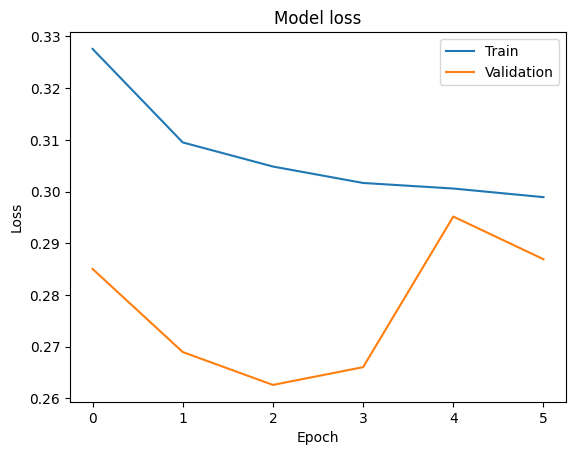

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Load the best model

from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Use the best model for prediction
y_pred = best_model.predict(X_val)

7318/7318 [==============================] - 20s 3ms/step


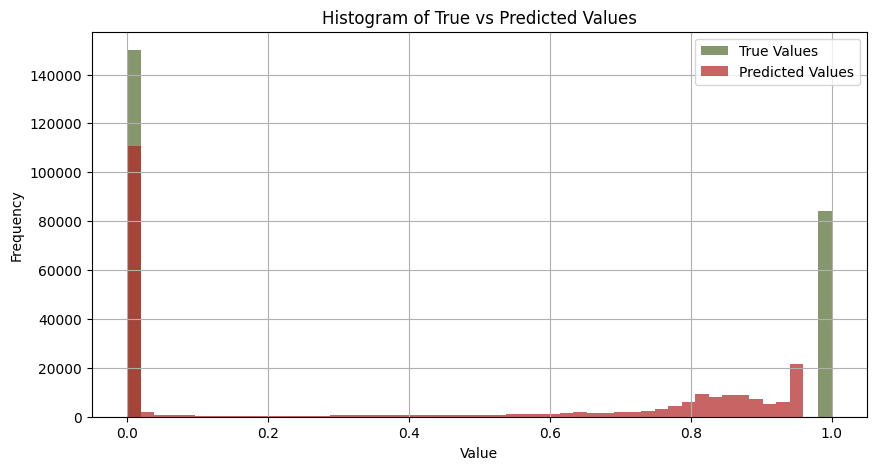

In [ ]:
# Look at the Histogram of the predictions / true values
import matplotlib.pyplot as plt

# Flatten the arrays for histogram plotting
y_val_flat = y_val.flatten()
y_pred_flat = y_pred.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(y_val_flat, bins=50, alpha=0.7, color='darkolivegreen', label='True Values')
plt.hist(y_pred_flat, bins=50, alpha=0.7, color='firebrick', label='Predicted Values')
plt.title('Histogram of True vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def round_array_to_threshold(arr, threshold):
    rounded_arr = np.where(arr >= threshold, 1, 0)
    return rounded_arr

In [ ]:
threshold = 0.6
rounded_array = round_array_to_threshold(y_pred, threshold)

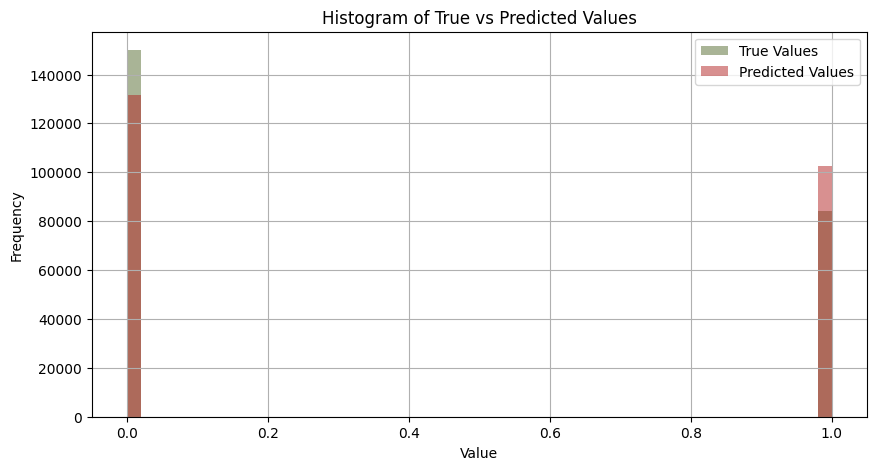

In [ ]:

# Flatten the arrays for histogram plotting
y_val_flat = y_val.flatten()
y_pred_flat = rounded_array.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(y_val_flat, bins=50, alpha=0.7, color='darkolivegreen', label='True Values')
plt.hist(y_pred_flat, bins=50, alpha=0.7, color='firebrick', label='Predicted Values')
plt.title('Histogram of True vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


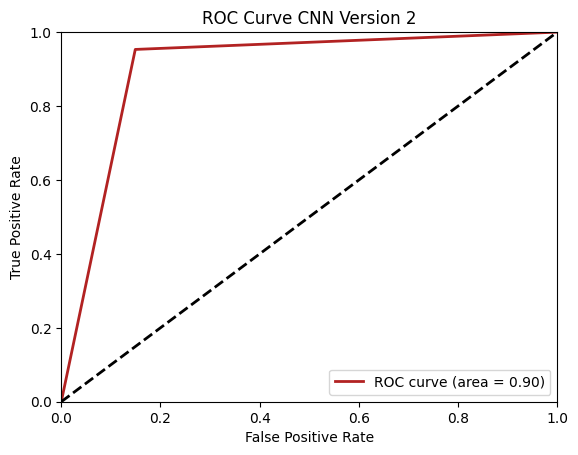

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val_flat, y_pred_flat)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='firebrick', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CNN Version 2')
plt.legend(loc='lower right')
plt.show()

Test the Model on 2 months of full scale data

In [ ]:
# Define paths
images_dir = '/content/months121and128'

# Function to load and preprocess images
def load_images_test(images_dir, num_vars, i, img_shape=(48, 48)):
    X_test = []
    y_test = []
    for x in range(1,7):
      for y_index in range (1,11):
              target_img_path = os.path.join(images_dir,f'tile{x}_{y_index}_burned_area_sample_{i}.png')

              if os.path.exists(target_img_path):

                    target_img = Image.open(target_img_path).convert('L')  # Convert to grayscale
                    target_img_array = np.array(target_img) / 255.0  # Normalize the pixel values
                    y_test.append(target_img_array)

                  # Load input variable images and stack them
                    stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
                    for j in range(num_vars):
                        img_path = os.path.join(images_dir, f'tile{x}_{y_index}_var{j}_sample_{i}.png')  # Adjusting the index
                        if os.path.exists(img_path):
                            img = Image.open(img_path).convert('L')  # Convert to grayscale
                            img_array = np.array(img) / 255.0  # Normalize the pixel values
                            stacked_img[:, :, j] = img_array

                    X_test.append(stacked_img)


    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return X_test, y_test


In [ ]:
# Define number of samples and variables
num_vars = 26

# Load images
X_test_121, y_test_121 = load_images_test(images_dir, num_vars, 121, img_shape=(48, 48)) # i = 104

X_test_128, y_test_128 = load_images_test(images_dir, num_vars, 128, img_shape=(48, 48)) # i = 110


In [ ]:
def image_maker(im_x):

  im1 = np.concatenate((im_x[0,:,:],im_x[1,:,:],im_x[2,:,:],im_x[3,:,:],im_x[4,:,:],im_x[5,:,:],im_x[6,:,:],im_x[7,:,:],im_x[8,:,:],im_x[9,:,:]), axis = 1)

  im2 = np.concatenate((im_x[10,:,:],im_x[11,:,:],im_x[12,:,:],im_x[13,:,:],im_x[14,:,:],im_x[15,:,:],im_x[16,:,:],im_x[17,:,:],im_x[18,:,:],im_x[19,:,:]), axis = 1)

  im3 = np.concatenate((im_x[20,:,:],im_x[21,:,:],im_x[22,:,:],im_x[23,:,:],im_x[24,:,:],im_x[25,:,:],im_x[26,:,:],im_x[27,:,:],im_x[28,:,:],im_x[29,:,:]), axis = 1)

  im4 = np.concatenate((im_x[30,:,:],im_x[31,:,:],im_x[32,:,:],im_x[33,:,:],im_x[34,:,:],im_x[35,:,:],im_x[36,:,:],im_x[37,:,:],im_x[38,:,:],im_x[39,:,:]), axis = 1)

  im5 = np.concatenate((im_x[40,:,:],im_x[41,:,:],im_x[42,:,:],im_x[43,:,:],im_x[44,:,:],im_x[45,:,:],im_x[46,:,:],im_x[47,:,:],im_x[48,:,:],im_x[49,:,:]), axis = 1)

  im6 = np.concatenate((im_x[50,:,:],im_x[51,:,:],im_x[52,:,:],im_x[53,:,:],im_x[54,:,:],im_x[55,:,:],im_x[56,:,:],im_x[57,:,:],im_x[58,:,:],im_x[59,:,:]), axis = 1)

  im = np.concatenate((im1, im2, im3, im4, im5, im6), axis = 0)

  return im

In [ ]:
im_121 = image_maker(X_test_121)
im_128 = image_maker(X_test_128)

im_y121 = image_maker(y_test_121)
im_y128 = image_maker(y_test_128)

In [ ]:
im_128.shape

(288, 480, 26)

In [ ]:
def tilemaking(X, y):

  X_new = []
  y_new = []

  for i in range (1, 288-1):
    for j in range(1, 480-1):
      Tile = X[i-1:i+2, j-1:j+2,:]
      X_new.append(Tile)
      y_new.append(y[i,j])


  X_new = np.array(X_new)
  y_new = np.array(y_new)
  return X_new, y_new

In [ ]:
X_121, y_121 = tilemaking(im_121, im_y121)
X_128, y_128 = tilemaking(im_128, im_y128)

In [ ]:
X_121.shape

(136708, 3, 3, 26)

In [ ]:
# Use the best model for prediction
y_pred_121 = best_model.predict(X_121)
y_pred_128 = best_model.predict(X_128)

4273/4273 [==============================] - 12s 3ms/step


In [ ]:
def reassemble_tiles(X_new, y_new, y_pred, original_shape=(288, 480), tile_size=(3, 3, 26)):
    # Define new shapes excluding borders
    new_shape_x = (original_shape[0] - 2, original_shape[1] - 2, tile_size[2])
    new_shape_y = (original_shape[0] - 2, original_shape[1] - 2)
    new_shape_y_pred = (original_shape[0] - 2, original_shape[1] - 2)

    # Initialize empty arrays with the new shapes
    X_reassembled = np.zeros(new_shape_x)
    y_reassembled = np.zeros(new_shape_y)
    y_reassembled_pred = np.zeros(new_shape_y_pred)

    idx = 0
    # Iterate through the range to reassemble both X and y
    for i in range(new_shape_x[0]):
        for j in range(new_shape_x[1]):
            X_reassembled[i, j, :] = X_new[idx][1, 1, :]  # Taking central point of the tile
            y_reassembled[i, j] = y_new[idx]
            y_reassembled_pred[i, j] = y_pred[idx]
            idx += 1

    return X_reassembled, y_reassembled, y_reassembled_pred

In [ ]:
X_121_reassembled, y_121_reassembled, y_121_reassembled_pred = reassemble_tiles(X_121, y_121, y_pred_121[:,0])

X_128_reassembled, y_128_reassembled, y_128_reassembled_pred = reassemble_tiles(X_128, y_128, y_pred_128[:,0])

In [ ]:
y_121_reassembled_pred.shape

(286, 478)

In [ ]:
plt.imshow(X_121_reassembled[:,:,25],  interpolation='none')

IndexError: index 26 is out of bounds for axis 2 with size 26

In [ ]:
X_121_reassembled.shape

(286, 478, 26)

Text(0.5, 1.0, 'Data? - True Fires')

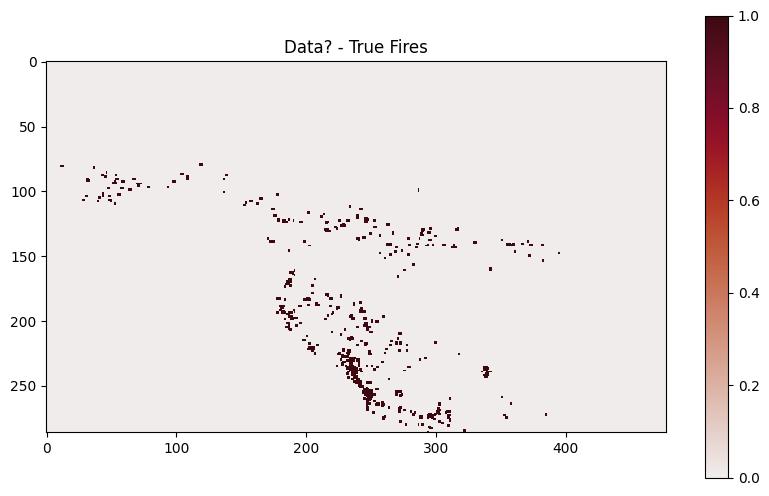

In [ ]:
plt.figure(figsize = (10,6))

plt.imshow(y_121_reassembled,  interpolation='none', cmap = cmocean.cm.amp)

plt.colorbar()


plt.title('Data? - True Fires')

Text(0.5, 1.0, 'Burned area reanalysis data, 2018-06')

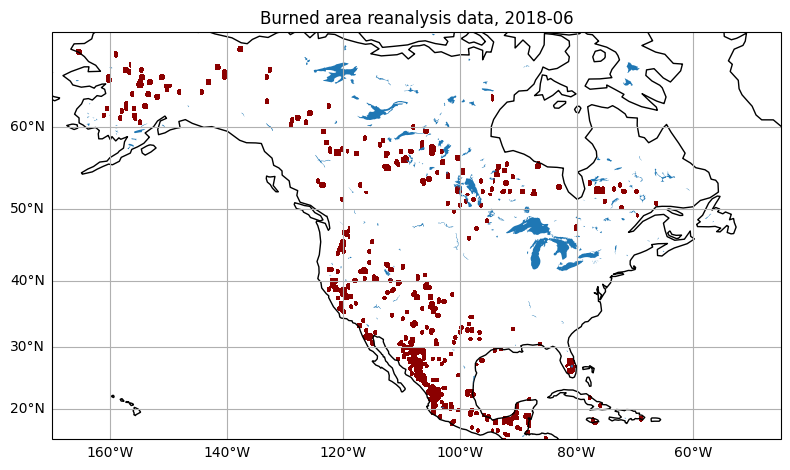

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors
unique_lats = np.linspace(15,89,286)
unique_lons = np.linspace(-168.5,-45,478)

cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "maroon"], N=50)

crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))

lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')



grid_array = np.flipud(y_121_reassembled)

fig = plt.figure(layout='tight')
fig.set_figwidth(10)


ax = plt.axes(projection=crs)

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting

# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous
#plt.title(f'Burned area: 2019-06 model prediction burned-area-weight')
#plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
plt.title(f'Burned area reanalysis data, 2018-06')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 2, 2018-06 Fire Prediction')

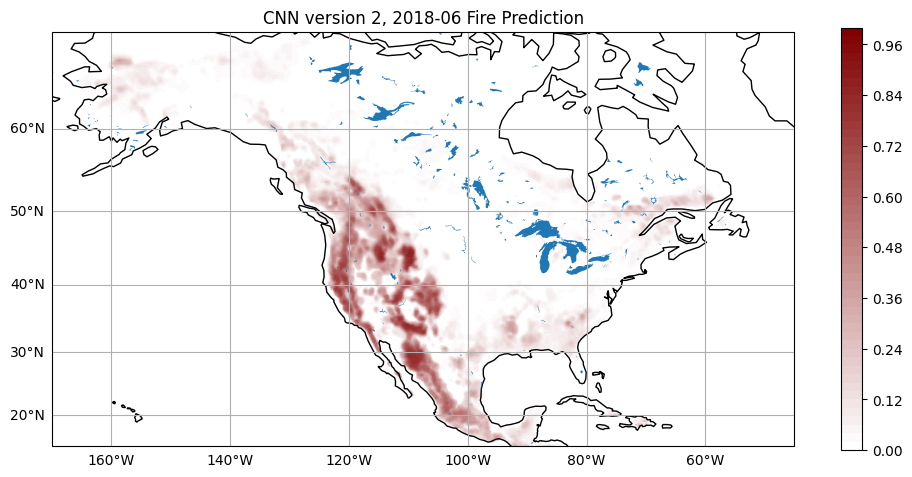

In [ ]:
grid_array = np.flipud(y_121_reassembled_pred)

fig = plt.figure(layout='tight')
fig.set_figwidth(10)


ax = plt.axes(projection=crs)

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

#c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,51)) # Continous plotting
cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

#plt.title(f'Burned area: 2019-06 model prediction burned-area-weight')
#plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
plt.title(f'CNN version 2, 2018-06 Fire Prediction')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'Data? - Predicted Fires')

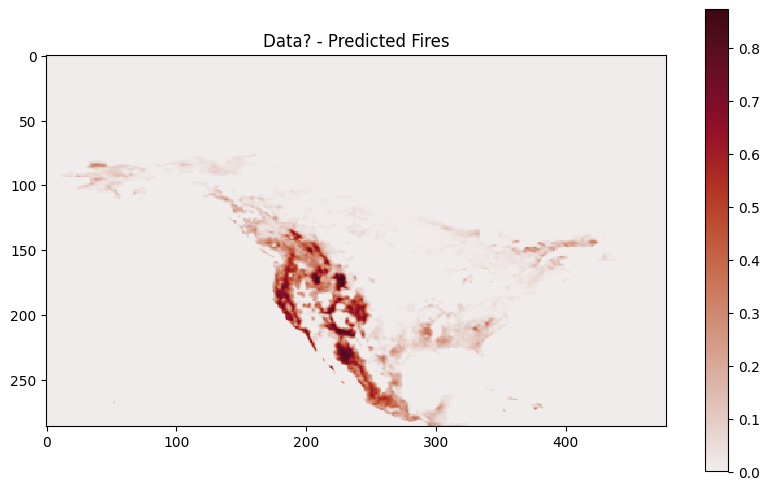

In [ ]:
plt.figure(figsize = (10,6))

plt.imshow(y_121_reassembled_pred,  interpolation='none', cmap = cmocean.cm.amp)

plt.colorbar()


plt.title('Data? - Predicted Fires')

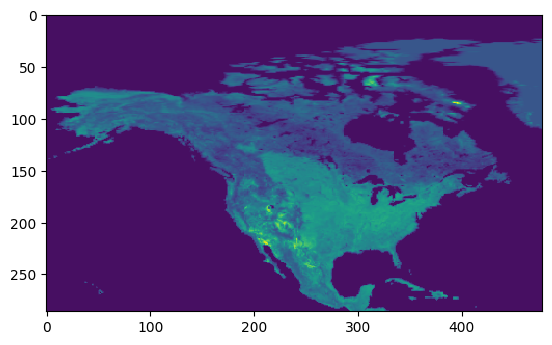

In [ ]:
plt.imshow(X_128_reassembled[:,:,5],  interpolation='none')

Text(0.5, 1.0, 'Date? - True Fires')

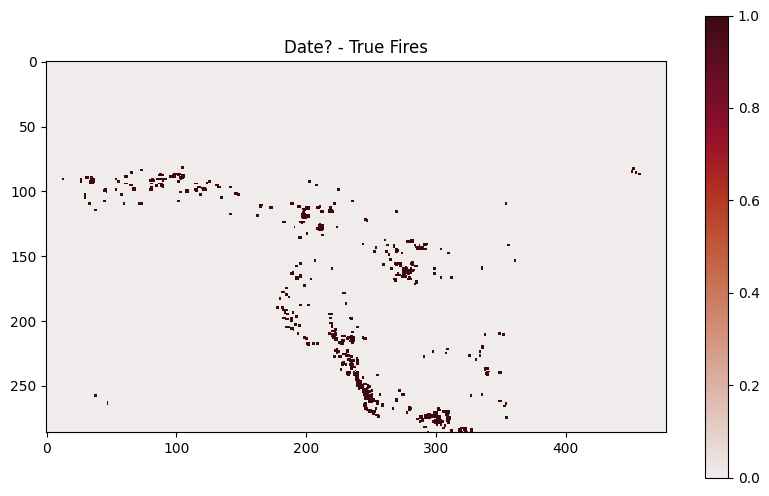

In [ ]:
plt.figure(figsize = (10,6))

plt.imshow(y_128_reassembled,  interpolation='none', cmap = cmocean.cm.amp)
plt.colorbar()


plt.title('Date? - True Fires')

Text(0.5, 1.0, 'Burned area reanalysis data, 2019-06')

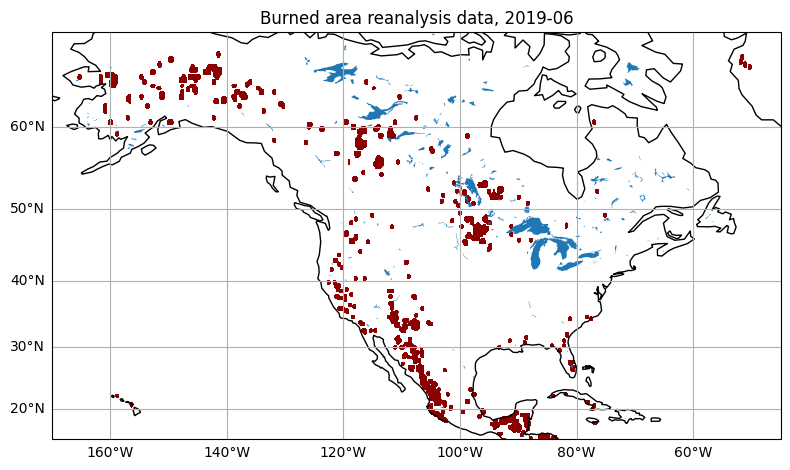

In [ ]:

grid_array = np.flipud(y_128_reassembled)

fig = plt.figure(layout='tight')
fig.set_figwidth(10)


ax = plt.axes(projection=crs)

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting

# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous
#plt.title(f'Burned area: 2019-06 model prediction burned-area-weight')
#plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
#plt.title(f'Burned area: 2018-06 True Fire')
plt.title(f'Burned area reanalysis data, 2019-06')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'Date? - Predicted Fires')

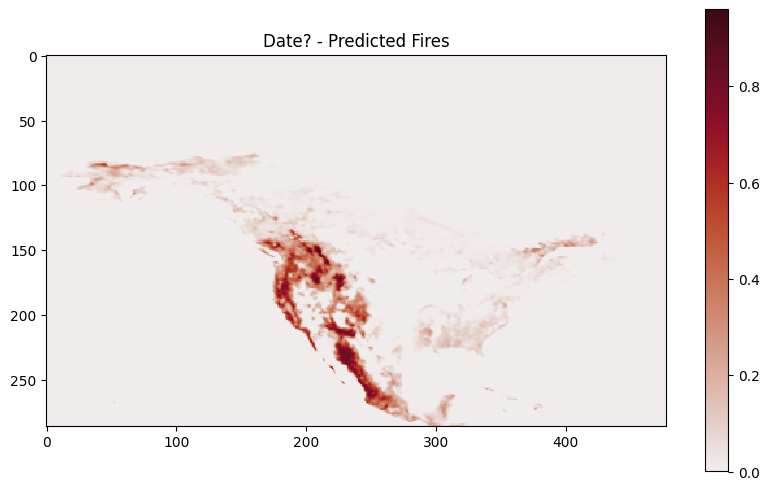

In [ ]:
plt.figure(figsize = (10,6))

plt.imshow(y_128_reassembled_pred,  interpolation='none', cmap = cmocean.cm.amp)
plt.colorbar()


plt.title('Date? - Predicted Fires')

Text(0.5, 1.0, 'CNN version 2, 2019-06 Fire Prediction')

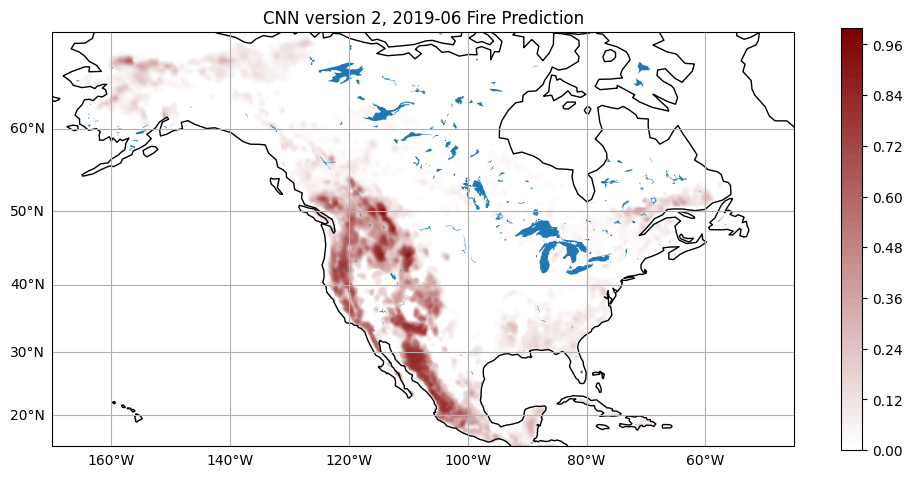

In [ ]:
grid_array = np.flipud(y_128_reassembled_pred)

fig = plt.figure(layout='tight')
fig.set_figwidth(10)


ax = plt.axes(projection=crs)

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

#c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,51)) # Continous plotting
cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

#plt.title(f'Burned area: 2019-06 model prediction burned-area-weight')
#plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
#plt.title(f'Burned area: 2018-06 Predicted Fire')
plt.title(f'CNN version 2, 2019-06 Fire Prediction')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 2, Difference 2019-06 and 2018-06 Fire Prediction')

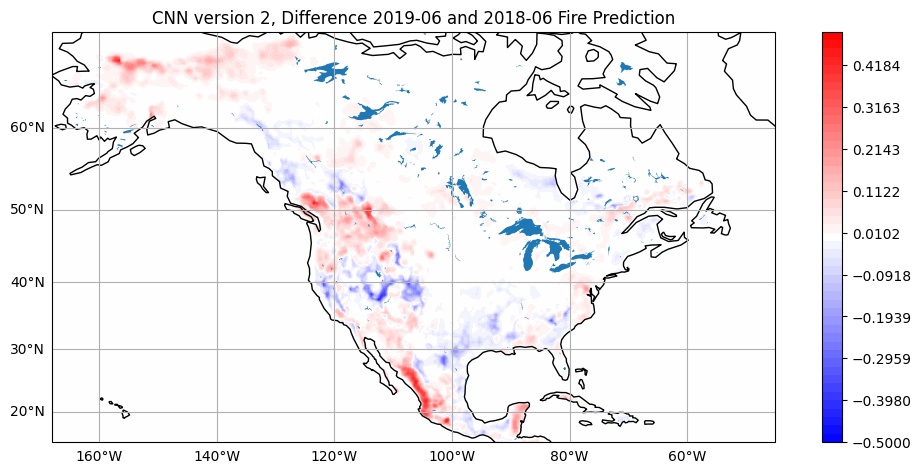

In [ ]:
grid_array = np.flipud(y_128_reassembled_pred - y_121_reassembled_pred)

fig = plt.figure(layout='tight')
fig.set_figwidth(10)


ax = plt.axes(projection=crs)

ax.set_extent([-168, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

#c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap='bwr', levels=np.linspace(-0.5,0.5,50)) # Continous plotting
cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

#plt.title(f'Burned area: 2019-06 model prediction burned-area-weight')
#plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
#plt.title(f'Burned area: 2018-06 Predicted Fire')
plt.title(f'CNN version 2, Difference 2019-06 and 2018-06 Fire Prediction')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'Date? - Predicted Fires Difference 121 and 128 months')

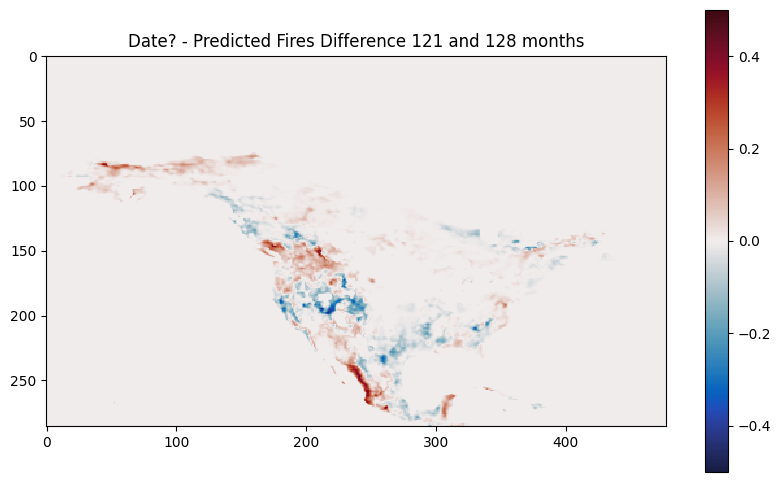

In [ ]:
plt.figure(figsize = (10,6))

plt.imshow(y_128_reassembled_pred - y_121_reassembled_pred,  interpolation='none', cmap = cmocean.cm.balance, vmin = -0.5, vmax = 0.5)
plt.colorbar()


plt.title('Date? - Predicted Fires Difference 121 and 128 months')

Text(0.5, 1.0, 'Date? - Threshold Predicted Fires')

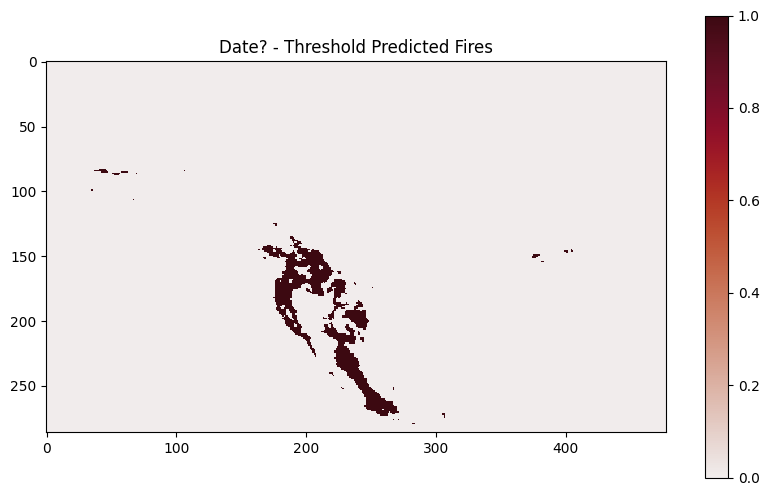

In [ ]:


plt.figure(figsize = (10,6))
plt.imshow(round_array_to_threshold(y_128_reassembled_pred, 0.3),  interpolation='none', cmap = cmocean.cm.amp)
plt.colorbar()

plt.title('Date? - Threshold Predicted Fires')